In [1]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')
library('IOBR')
library(GSVA)
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)
head(data,2)
data = data[!duplicated(data$Gene_name),]
expr = data %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'Gene_name') 
Group = c(rep('con',31),rep('IS',43))

library(IOBR)
head(expr,2)
#expr_coad <- log2(expr+0.1)
expr_coad = expr
#expr_coad <- expr_coad[apply(expr_coad,1,sd)>0.5,]
tme_deconvolution_methods
dim(expr_coad)
# packageVersion('GSVA')

# im_ssgsea <- deconvo_tme(eset = expr_coad,
#                         method = "xcell",
#                         arrays = F
#                         )

Loading required package: tibble

Warning message:
"package 'tibble' was built under R version 4.2.3"
Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:dbplyr':

    ident, sql


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Loading required package: survival

Warning message:
"package 'survival' was built under R version 4.2.3"
Loading required package: ComplexHeatmap

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite eit

,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,7.70851,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,20.41526,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


MCPcounter               EPIC              xCell          CIBERSORT 
      "mcpcounter"             "epic"            "xcell"        "cibersort" 
CIBERSORT Absolute                IPS           ESTIMATE                SVR 
   "cibersort_abs"              "ips"         "estimate"              "svr" 
              lsei              TIMER          quanTIseq 
            "lsei"            "timer"        "quantiseq"

[1] 30983    74

In [2]:
colnames(data)

[1] "Gene_name" "C10"       "C11"       "C12"       "C13"       "C14"      
 [7] "C15"       "C16"       "C17"       "C18"       "C19"       "C1"       
[13] "C20"       "C21"       "C22"       "C23"       "C24"       "C25"      
[19] "C26"       "C27"       "C28"       "C29"       "C2"        "C30"      
[25] "C31"       "C3"        "C4"        "C5"        "C6"        "C7"       
[31] "C8"        "C9"        "CI10"      "CI11"      "CI12"      "CI13"     
[37] "CI14"      "CI15"      "CI16"      "CI17"      "CI18"      "CI19"     
[43] "CI20"      "CI21"      "CI22"      "CI23"      "CI24"      "CI25"     
[49] "CI26"      "CI27"      "CI28"      "CI29"      "CI2"       "CI30"     
[55] "CI31"      "CI32"      "CI33"      "CI34"      "CI35"      "CI36"     
[61] "CI37"      "CI38"      "CI39"      "CI3"       "CI40"      "CI41"     
[67] "CI42"      "CI43"      "CI44"      "CI4"       "CI5"       "CI6"      
[73] "CI7"       "CI8"       "CI9"

In [3]:
library(dplyr)

library(tidyverse)

cellMarker <- read.csv("/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data/cellmarker.txt", header = F, sep = "\t") # 用EXCEL打开删除NA列
cellMarker <- cellMarker %>% column_to_rownames("V1") %>% t()

a <- cellMarker
a <- a[1:nrow(a), ]
set <- colnames(a)
geneSet <- list()
# 
for (i in set) {
  x <-  as.character(a[,i])
  x <- x[nchar(x)!=0]
  x <-  as.character(x)
  geneSet[[i]] <-x
}

im_ssgsea <- calculate_sig_score(eset = expr_coad, signature = geneSet , method = "ssgsea")


>>> Calculating signature score using ssGSEA method

>>> log2 transformation is not necessary

i GSVA version 2.0.0

! 2000 genes with constant values throughout the samples

! Genes with constant values are discarded

i Calculating GSVA ranks

i GSVA dense (classical) algorithm

i Row-wise ECDF estimation with Gaussian kernels

i Calculating GSVA column ranks

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
i Calculating GSVA scores

v Calculations finished



In [4]:
ssgeea = im_ssgsea

ssgeea$group <- Group # 
#ssgeea <- ssgeea %>% rownames_to_column("ID")

library(ggpubr)
library(ggpubr)
library(tidyr)

colnames(ssgeea) = gsub('_xCell','',colnames(ssgeea) )

a  = ssgeea

options(repr.plot.width = 13,repr.plot.height = 6)

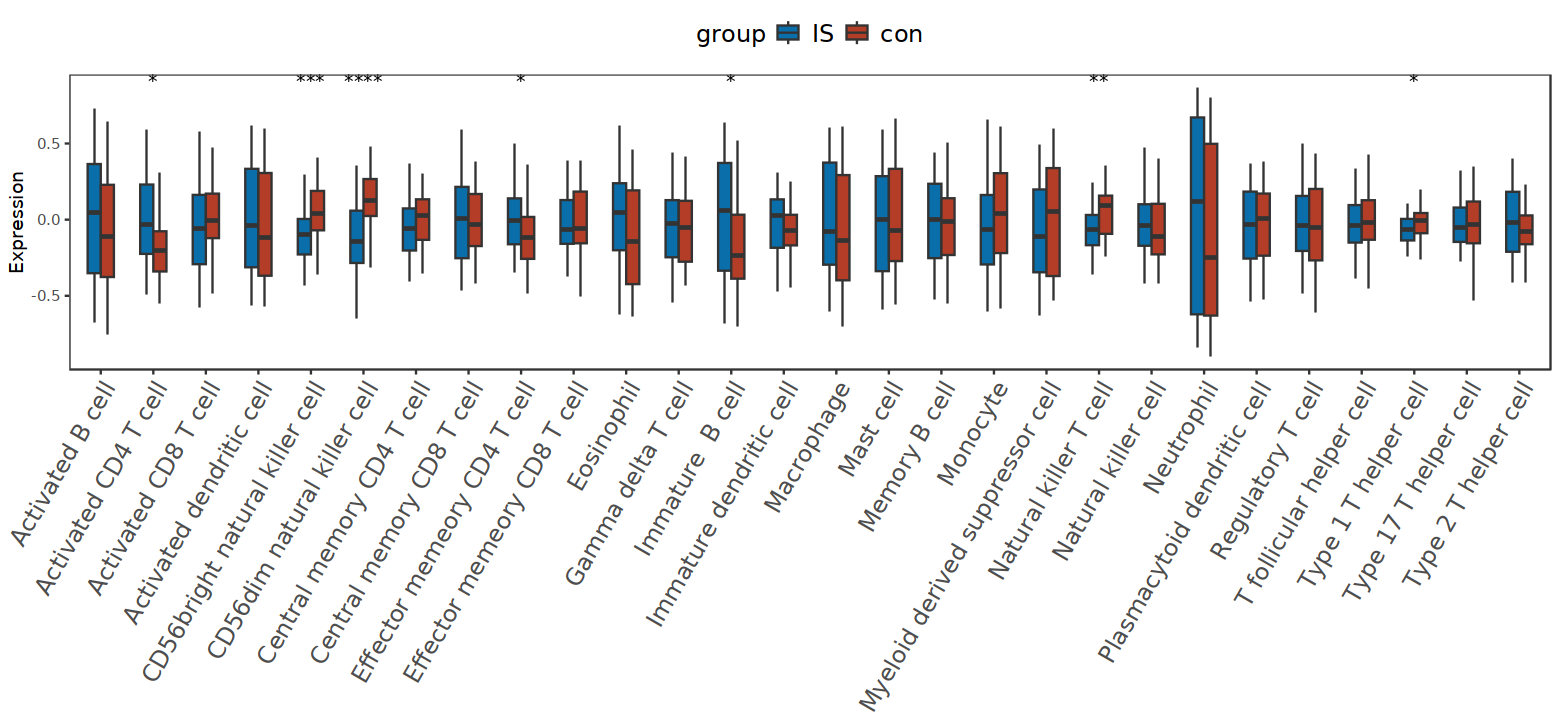

In [5]:
LUAD_ggsea <- gather(a,key = ssgsea, value = Expression, -c(group,ID)) 

ggplot(LUAD_ggsea, aes(x = ssgsea, y = Expression)) + 
  labs(y="Expression", x =  NULL) +  
  geom_boxplot(aes(fill = group), position = position_dodge(0.5), width = 0.5, outlier.alpha = 0) + 
  scale_fill_manual(values = c("#096EA9", "#B33D27")) +
  theme_bw() + 
  theme(plot.title = element_text(size = 14,color="black",hjust = 1), 
        axis.text.x = element_text(angle = 60, hjust = 1 ,size = 14,vjust = 1),
        panel.grid = element_blank(),
        legend.position = "top",
        legend.text = element_text(size= 14),
        legend.title= element_text(size= 14)) + 
  stat_compare_means(aes(group =  group),
                     label = "p.signif",
                     method = "t.test",
                     hide.ns = T)

In [6]:
ggsave('./fig.re///ssgsea.sample74.pdf',width = 13,height = 6)

Warning message:
"package 'pheatmap' was built under R version 4.2.3"

Attaching package: 'pheatmap'


The following object is masked from 'package:ComplexHeatmap':

    pheatmap




png 
  2

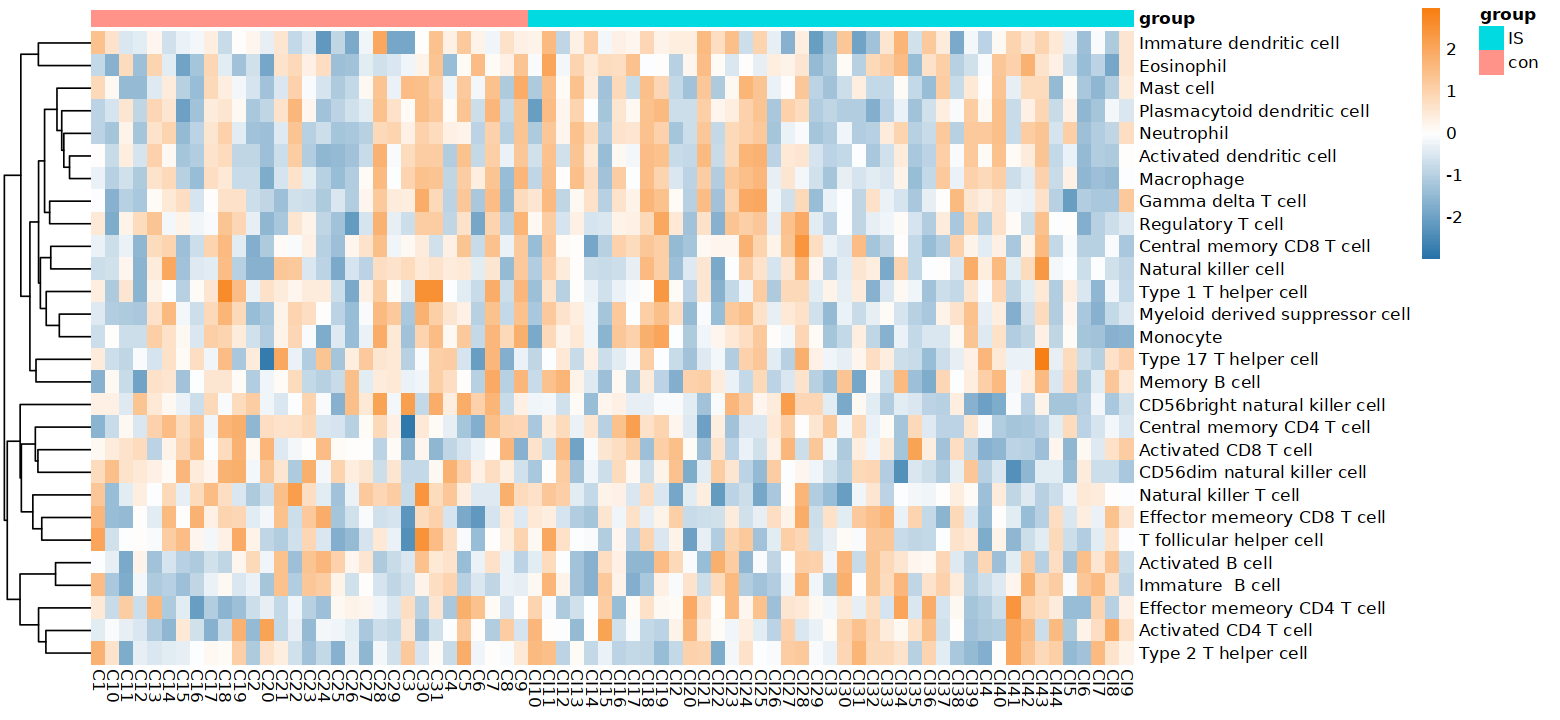

In [7]:
cell = im_ssgsea %>% tibble::column_to_rownames(.,'ID') %>%t() %>% as.data.frame()

library(pheatmap)
annotation_col = data.frame(c(rep('con',31),rep('IS',43)))
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(cell)

x = pheatmap(cell,
         cluster_rows = TRUE,
         cluster_cols = F,
         show_rownames=T,
         show_colnames = T,
          scale="row",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#
         # angle_col = 45 #
)
pdf('./fig.re/sample74.ssgsea.pdf',width = 12,height = 5)
x
dev.off()


Attaching package: 'linkET'


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:clusterProfiler':

    simplify


The following object is masked from 'package:ComplexHeatmap':

    anno_link


Joining with `by = join_by(gene, cell_type)`


gene,cell_type,correlation,pvalue,stars
<chr>,<chr>,<dbl>,<dbl>,<fct>
TXN,Activated CD8 T cell,-0.25938541,2.590571e-02,*
TXN,Central memory CD8 T cell,0.02972233,8.011354e-01,
TXN,Effector memeory CD8 T cell,-0.24010367,3.958488e-02,*
TXN,Activated CD4 T cell,0.20627916,7.792564e-02,
TXN,Central memory CD4 T cell,-0.20607183,7.823003e-02,
TXN,Effector memeory CD4 T cell,0.45211403,6.321844e-05,***


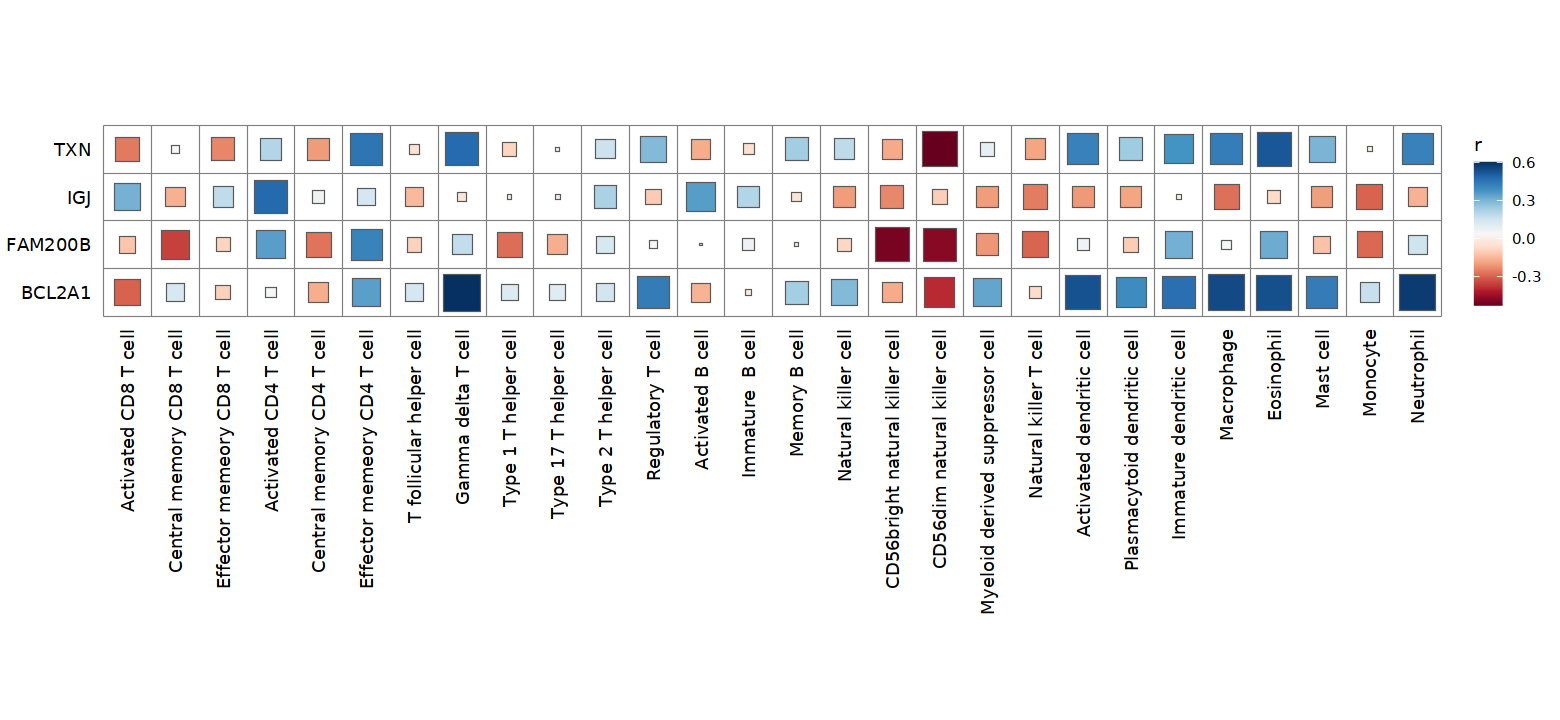

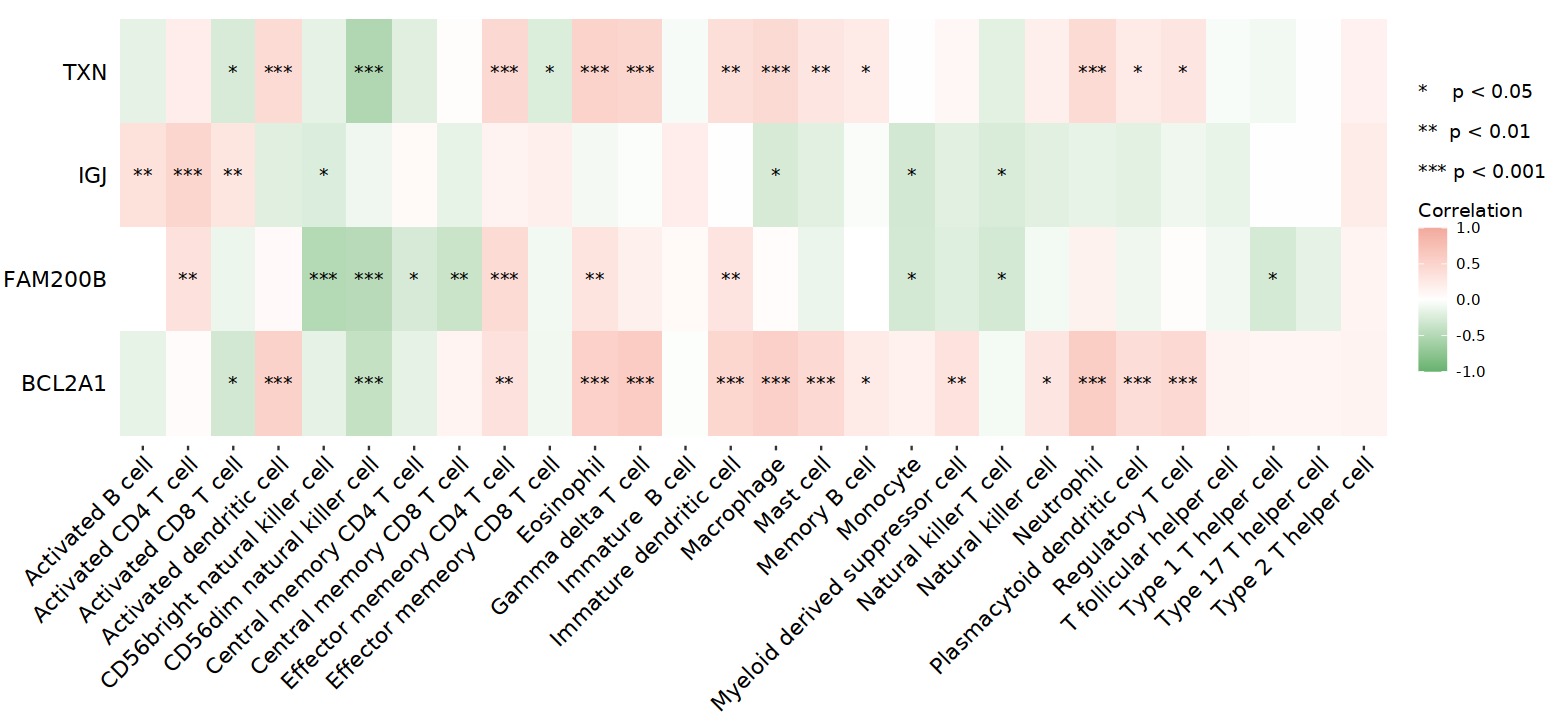

In [8]:
expr1 = expr[c('TXN','IGJ','FAM200B','BCL2A1') ,colnames(cell)] %>%t() %>%  as.data.frame()

cell2 = cell %>%t() %>%  as.data.frame()

library(linkET)

cor_res <- correlate( expr1,cell2,method = "spearman")
  
qcorrplot(cor_res) +
  geom_square() +
  scale_fill_gradientn(colours = RColorBrewer::brewer.pal(11, "RdBu"))

# 
df_r <- cor_res$r %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") %>% 
  pivot_longer(-1,names_to = "cell_type",values_to = "correlation")

df_p <- cor_res$p %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") %>% 
  pivot_longer(-1,names_to = "cell_type",values_to = "pvalue")

df_cor <- df_r %>% 
  left_join(df_p) %>% 
  mutate(stars = cut(pvalue,breaks = c(-Inf,0.05,0.01,0.001,Inf),right = F,labels = c("***","**","*"," ")))
## Joining with `by = join_by(gene, cell_type)`

head(df_cor)

library(ggplot2)

ggplot(df_cor, aes(cell_type,gene))+
  geom_tile(aes(fill=correlation))+
  geom_text(aes(label=stars), color="black", size=4)+
  scale_fill_gradient2(low='#67B26F', high='#F2AA9D',mid = 'white',
                      limit=c(-1,1),name=paste0("*    p < 0.05","\n\n","**  p < 0.01","\n\n","*** p < 0.001","\n\n","Correlation"))+
  labs(x=NULL,y=NULL)+
  theme(axis.text.x = element_text(size=13,angle = 45,hjust = 1,color = "black"),
        axis.text.y = element_text(size=13,color = "black"),
        axis.ticks.y = element_blank(),
        panel.background=element_blank())
ggsave('./fig.re/sample74.cor.pdf',width = 10,height = 4)